# Finance Data Project 

The goal of this project is to analyze the impact of the coronavirus pandemic on stock market using Python libraries such as Pandas, NumPy, Matplotlib and Seaborn.
____
The project will focus on the stock market crash that accurred in March 2020, when the outbreak of the coronavirus was first reported. The data used in this will be collected using Naver Finance API which includes stock market indices of the top six banks in America. We will be specifically focusing on the stock data of Bank of America, Citigroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo. We will use the data to perform tasks such as data visualization, and statistical analysis.
____
This project will be useful for investors, financial analysts and other financial professionals looking to make better investment decisions.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/2020_stock_market_crash) all the way to early 2021.

## Fetching the Data

In this section we will use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports.

*Note: [Install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance. (**pip install pandas-datareader**)*

### The Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We are getting the stock data from Jan 1st 2019 to Jan 1st 2021 for each of these banks. We will set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

------------

In [2]:

BAC = yf.download('BAC',start='2019-09-10',end='2021-10-09')
df = yf.download('GE', start='2019-09-10', end='2021-10-09')
C = yf.download('C', start='2019-09-10', end='2021-10-09')
GS = yf.download('GS', start='2019-09-10', end='2021-10-09')
JPM = yf.download('JPM', start='2019-09-10', end='2021-10-09')
MS = yf.download('MS', start='2019-09-10', end='2021-10-09')
WFC = yf.download('WFC', start='2019-09-10', end='2021-10-09')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Importing Seaborn for visualization.

In [3]:
import seaborn as sns

Creating a list of the ticker symbols (as strings) in alphabetical order.

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Keys argument is set to the tickers list.

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

Set the column name levels:

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

A look at the head of our dataframe

In [7]:
bank_stocks.head()

Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Date                                                                    
2019-09-10 00:00:00-04:00  28.889999  29.350000  28.809999  29.350000   
2019-09-11 00:00:00-04:00  29.370001  29.469999  28.900000  29.459999   
2019-09-12 00:00:00-04:00  29.219999  29.799999  28.910000  29.670000   
2019-09-13 00:00:00-04:00  30.000000  30.320000  29.870001  30.170000   
2019-09-16 00:00:00-04:00  29.680000  30.170000  29.639999  30.129999   

Bank Ticker                                             C             \
Stock Info                 Adj Close    Volume       Open       High   
Date                                                                   
2019-09-10 00:00:00-04:00  27.256632  71066200  69.180000  70.010002   
2019-09-11 00:00:00-04:00  27.358786  53982200  68.720001  69.209999   
2019-09-12 00:00:00-04:00  27.553806  72943900  68.110001  70.059998   
2019-09-13 00:00:00-04:00  28.018145  79657000  70.339996  70.739998   
2019-09-16 00:00:00-04:00  27.980999  43391300  68.959999  70.110001   

Bank Ticker                                      ...         MS             \
Stock Info                       Low      Close  ...        Low      Close   
Date                                             ...                         
2019-09-10 00:00:00-04:00  68.449997  68.980003  ...  43.060001  43.580002   
2019-09-11 00:00:00-04:00  68.110001  68.900002  ...  43.209999  43.939999   
2019-09-12 00:00:00-04:00  67.930000  69.300003  ...  43.380001  44.320000   
2019-09-13 00:00:00-04:00  69.849998  70.389999  ...  44.730000  45.160000   
2019-09-16 00:00:00-04:00  68.959999  69.830002  ...  44.349998  44.750000   

Bank Ticker                                           WFC             \
Stock Info                 Adj Close    Volume       Open       High   
Date                                                                   
2019-09-10 00:00:00-04:00  39.618946  12292700  48.070000  48.930000   
2019-09-11 00:00:00-04:00  39.946228   9877900  48.290001  48.980000   
2019-09-12 00:00:00-04:00  40.291687  13254300  48.520000  49.080002   
2019-09-13 00:00:00-04:00  41.055336  11364500  49.009998  49.360001   
2019-09-16 00:00:00-04:00  40.682613   6289800  48.459999  49.000000   

Bank Ticker                                                           
Stock Info                       Low      Close  Adj Close    Volume  
Date                                                                  
2019-09-10 00:00:00-04:00  48.070000  48.310001  44.342888  25822400  
2019-09-11 00:00:00-04:00  47.790001  48.849998  44.838543  19190000  
2019-09-12 00:00:00-04:00  48.220001  48.650002  44.654968  24305900  
2019-09-13 00:00:00-04:00  48.660000  48.919998  44.902790  25142400  
2019-09-16 00:00:00-04:00  48.400002  48.980000  44.957870  17759700  

[5 rows x 36 columns]

# Exploratory Data Analysis

Check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

What is the max Close price for each bank's stock throughout the time period?

In [8]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 44.34000015258789
C 81.91000366210938
GS 419.69000244140625
JPM 170.22000122070312
MS 105.44999694824219
WFC 54.459999084472656


Another method using .xs

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     44.340000
C       81.910004
GS     419.690002
JPM    170.220001
MS     105.449997
WFC     54.459999
dtype: float64

Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-09-10 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11 00:00:00-04:00,0.003748,-0.001160,0.005426,0.002738,0.008261,0.011178
2019-09-12 00:00:00-04:00,0.007128,0.005806,0.008948,0.006144,0.008648,-0.004094
2019-09-13 00:00:00-04:00,0.016852,0.015729,0.005303,0.019676,0.018953,0.005550
2019-09-16 00:00:00-04:00,-0.001326,-0.007956,-0.012187,-0.008900,-0.009079,0.001227


Creating a pairplot using seaborn of the returns dataframe.

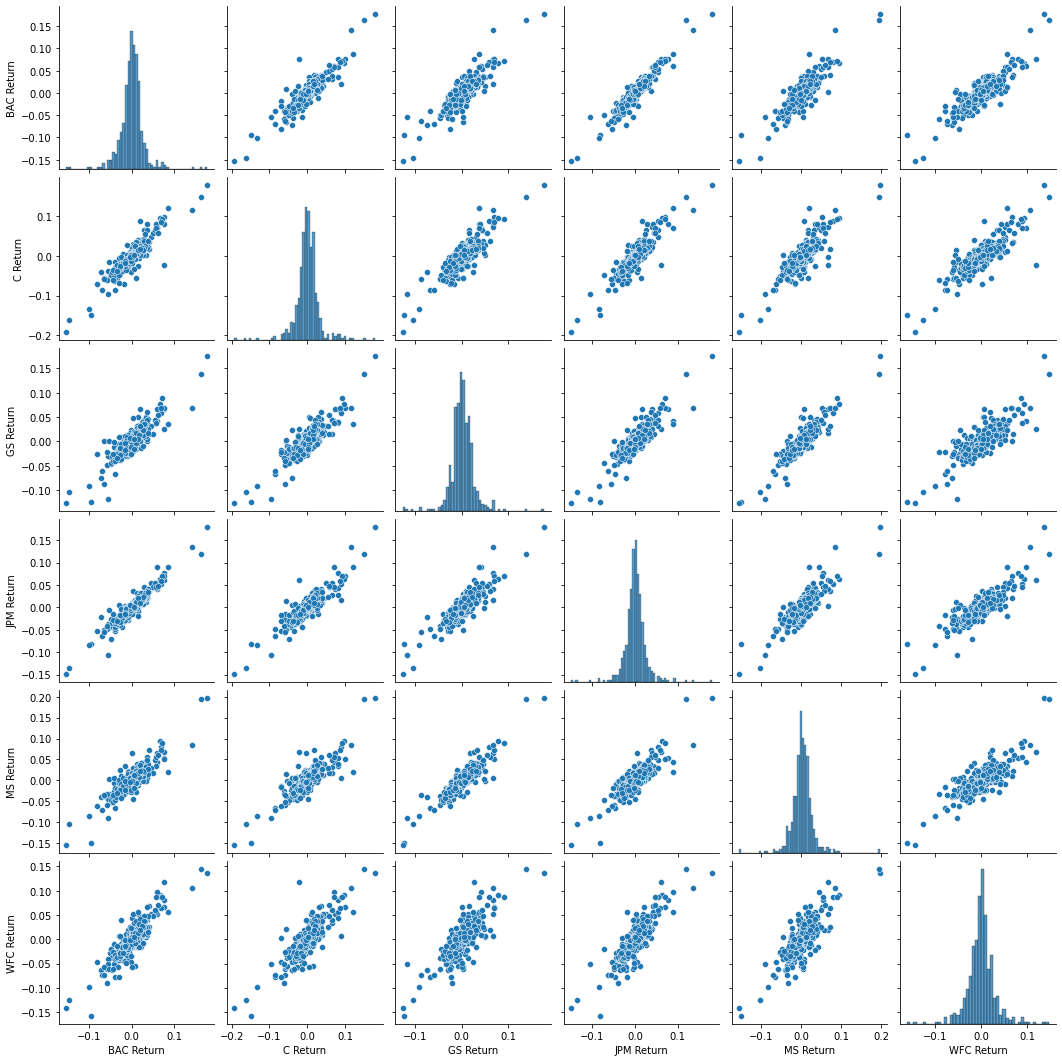

In [12]:
sns.pairplot(returns[1:])

Using this returns DataFrame, we can figure out on what dates each bank stock had the best and worst single day returns. Noticeably there are 5 banks who share the same day for the worst drop, did anything significant happen during this period?

The stock market fall in March 2020 was largely driven by concerns about the economic impact of the COVID-19 pandemic and the measures taken to slow its spread, such as lockdowns and business closures. The market experienced significant volatility as investors tried to assess the potential damage to the global economy. Additionally, the oil price war between Russia and Saudi Arabia, which sent oil prices down sharply, also added to the market uncertainty and further contributed to the market fall.

In [13]:
returns.idxmin()

BAC Return   2020-03-16 00:00:00-04:00
C Return     2020-03-16 00:00:00-04:00
GS Return    2020-03-16 00:00:00-04:00
JPM Return   2020-03-16 00:00:00-04:00
MS Return    2020-03-16 00:00:00-04:00
WFC Return   2020-03-12 00:00:00-04:00
dtype: datetime64[ns, America/New_York]

Also check the highest single day return for each bank's stock.

In [14]:
returns.idxmax()

BAC Return   2020-03-13 00:00:00-04:00
C Return     2020-03-13 00:00:00-04:00
GS Return    2020-03-13 00:00:00-04:00
JPM Return   2020-03-13 00:00:00-04:00
MS Return    2020-03-13 00:00:00-04:00
WFC Return   2020-03-24 00:00:00-04:00
dtype: datetime64[ns, America/New_York]

We can observe that before the crash there was a hugh bull run in these stocks. 

By taking a look at the standard deviation of the returns, we can classify a stock as the riskiest over the entire time period. Which stock we should classify as the riskiest for the year 2020?



In [15]:
returns.std()

BAC Return    0.027772
C Return      0.031612
GS Return     0.025179
JPM Return    0.025481
MS Return     0.027398
WFC Return    0.030054
dtype: float64

Citi Bank can be considered the riskiest over the entire time period.

In [16]:
returns.loc['2020-01-01':'2020-12-31'].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

Creating a distplot using seaborn of the 2020 returns for Morgan Stanley.

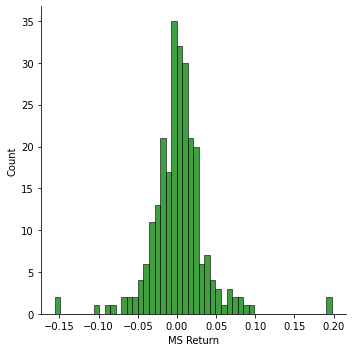

In [17]:
sns.displot(returns.loc['2020-01-01':'2020-12-31']['MS Return'],color='green',bins=50)

Creating a distplot using seaborn of the 2019 returns for CitiGroup.

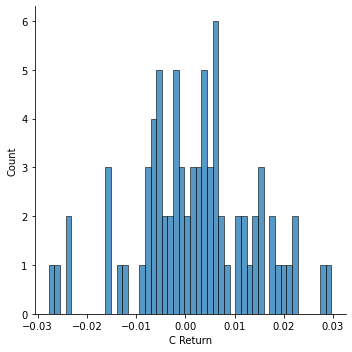

In [18]:
sns.displot(returns.loc['2019-01-01':'2019-12-31']['C Return'],bins=50)

____
# Visualization

In this section visualizations is done by using seaborn, matplotlib, plotly and cufflinks, and pandas.

### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

Creating a line plot showing close price for each bank for the entire index of time.

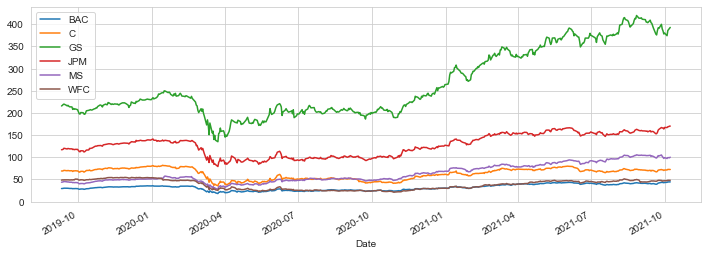

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Analysis of the moving average for BAC in the year 2020. 

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020

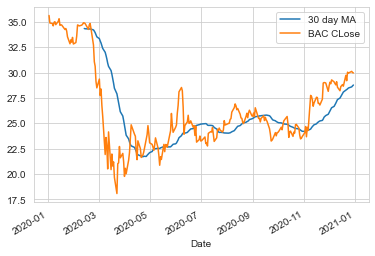

In [24]:
from pytz import timezone 
tz =timezone('UTC')
start = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 1, 1)))
end = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 12, 31)))
BAC['Close'].iloc[start:end].rolling(window=30).mean().plot(label='30 day MA')
BAC['Close'].iloc[start:end].plot(label='BAC CLose')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

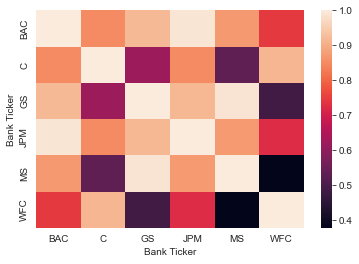

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr())

Using seaborn's clustermap to cluster the correlations together:

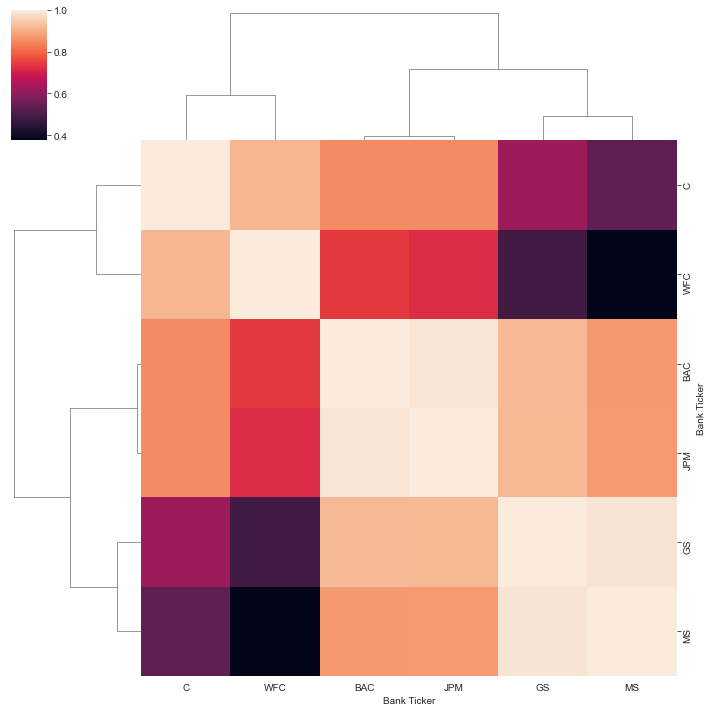

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr())

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2

In this part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks.

Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2020 to Dec 31st 2020.

In [29]:
start = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 1, 1)))
end = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 12, 31)))
bac20 = BAC[['Open','High','Low','Close']].iloc[start:end]
bac20.iplot(kind='candle')

Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2020.

In [30]:
start = MS.index.searchsorted(tz.localize(dt.datetime(2020, 1, 1)))
end = MS.index.searchsorted(tz.localize(dt.datetime(2020, 12, 31)))
MS['Close'].iloc[start:end].ta_plot(study='sma',periods=[13,21,55])

Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2020.

In [31]:
start = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 1, 1)))
end = BAC.index.searchsorted(tz.localize(dt.datetime(2020, 12, 31)))
BAC['Close'].iloc[start:end].ta_plot(study='sma',periods=[13,21,55])

# Project Closure